<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [531]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

sns.set_style('darkgrid')

In [532]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [533]:
df.info()
# many categorical values
# string format
# 400K rows
# loan_status is the class
# 26 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

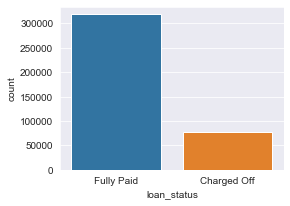

In [534]:
# Countlplot of the class
plt.figure(figsize=(4,3))
sns.countplot('loan_status', data=df)
# NOT well balanced, though that's a good thing in terms of loan defaults
# typical for classification problems related to fraud of spam
# we'll fair well on accuracy
# but precision and recall are what we'll have to assess the model on
# don't expect to perform that well on precision and recall, due to the imbalance

**TASK: Create a histogram of the loan_amnt column.**

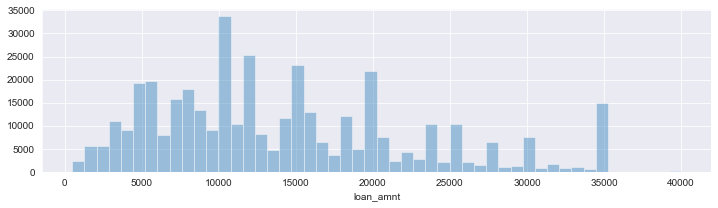

In [535]:
# Histogram of loan_amnt
plt.figure(figsize=(12,3))
sns.distplot(df['loan_amnt'], bins=50, kde=False)
# spikes at the even money amounts

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [536]:
# CODE HERE
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

(12, 0)

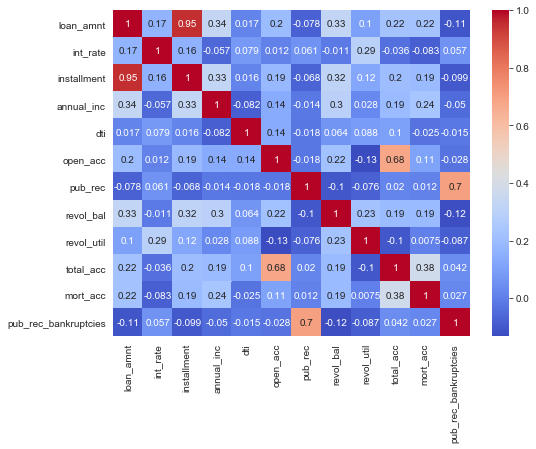

In [537]:
# CODE HERE
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.ylim(12,0) # fixes the axis so labels are not cutoff
# very high +ve corr with installment and loan_amount
# high corr between total_acc + open_acc, pub_rec + pub_rec_bankruptcies

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [538]:
# Descriptions of highly corr features
# need to ensure we're not leaking info from our features into the label
# a feature that's a perfect predictor of the label is not really a feature
# rather, it could be duplicate info that's related to the label
feat_info('installment')
# based on the description, installment IF loan originates

The monthly payment owed by the borrower if the loan originates.


In [539]:
feat_info('loan_amnt')
# makes sense that prospecitve installment correlates with loan_amount,
# as there would be a formula to calculate the installment based on loan amount applied for

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


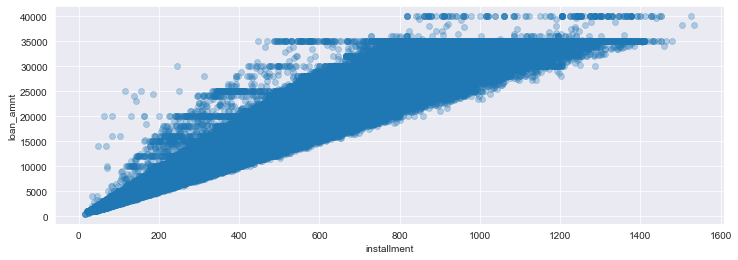

In [540]:
# scatter plot of loan_amnt and installment
# to confirm that installment is a derivative of loan amount, based on some formula
plt.figure(figsize=(12,4))
sns.scatterplot('installment','loan_amnt', data=df, alpha=0.3, edgecolor=None)
# appears 

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

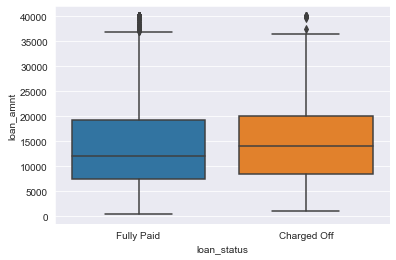

In [541]:
# boxplot to see if large loan amount tends to lead to defaults
# and smaller loan amounts get paid off
plt.figure(figsize=(6,4))
sns.boxplot('loan_status', 'loan_amnt', data=df)
# That's not the case
# loan amount doesnt differ much by the class,
# charged off has a slightly higher mean loan amount
# meaning if loan amount is higher, there is a slightly higher chance for default (charged off)
# intuitively makes sense, harder to pay off large loans

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [542]:
df.groupby('loan_status')['loan_amnt'].describe()
# This shows the numbers behind the boxplot

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [543]:
# Unique possible Grades
df['grade'].unique()


array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [544]:
# Unique Sub Grades
df['sub_grade'].unique()
# sub grades contain the grade info as well

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [545]:
# check the description of grade and sub grade
feat_info('grade')
feat_info('sub_grade')

LC assigned loan grade
LC assigned loan subgrade


**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

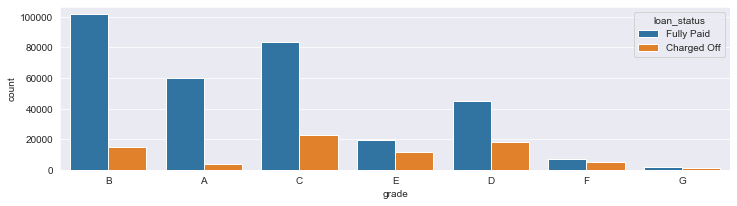

In [546]:
# Countplot of grade
plt.figure(figsize=(12,3))
sns.countplot('grade', data=df, hue='loan_status')
# need to reorder the X-axis to that it's ascending
# but looks like as the grade letter increases, charged off loans increases

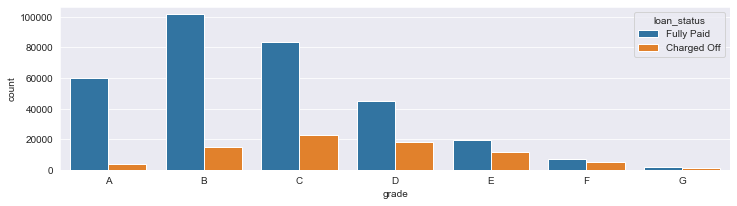

In [547]:
plt.figure(figsize=(12,3))
sns.countplot('grade', data=df.sort_values('grade'), hue='loan_status')
# charged off as a percentage of total loan status clearly increases as grade increases
# F & G grades don't get paid back often

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

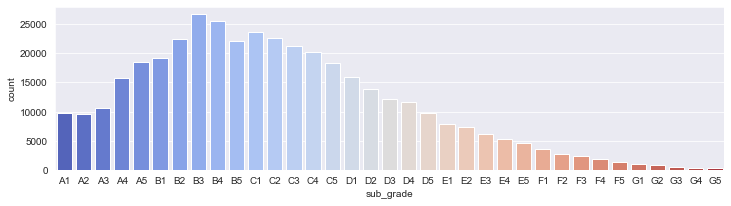

In [548]:
#CODE HERE
plt.figure(figsize=(12,3))
sns.countplot('sub_grade', data=df.sort_values('sub_grade'), palette='coolwarm')
# better grades are blue-er and worse grades are red-er
# charged off as a percentage of total loan status clearly increases as sub-grade increases

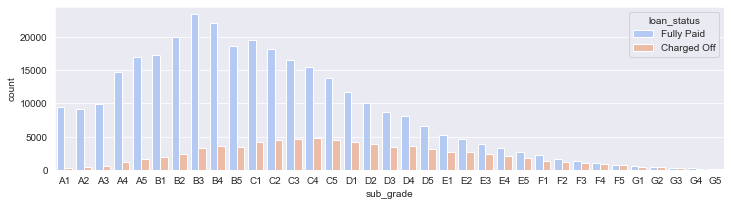

In [549]:
#CODE HERE
plt.figure(figsize=(12,3))
sns.countplot('sub_grade', data=df.sort_values('sub_grade'), hue='loan_status', palette='coolwarm')
# charged off as a percentage of total loan status clearly increases as sub-grade increases
# F & G sub-grades don't get paid back often

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

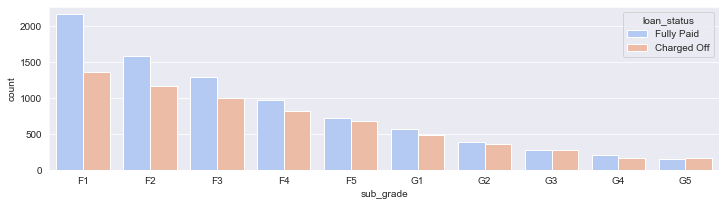

In [550]:
# CODE HERE
df_grade_FG = df[(df['grade'] == 'F') | (df['grade'] == 'G')].sort_values('sub_grade')
plt.figure(figsize=(12,3))
sns.countplot('sub_grade', data=df_grade_FG, hue='loan_status', hue_order=['Fully Paid','Charged Off'], palette='coolwarm')
# sub grade G5, more charged off than fully paid
# even for G3

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [551]:
# Create new column for loan_repaid as boolean based on loan_status
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if (x == 'Fully Paid') else 0)
# map function also works
# df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Chargd Off':0})

In [552]:
df[['loan_status', 'loan_repaid']].head()

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

In [553]:
# corr of features against class, dropping class
df.corr()['loan_repaid'][:-1].sort_values()
# int_rate seems to have the highsest corr and it's -ve
# does the same thing:
#df.corr()['loan_repaid'].drop('loan_repaid').sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
Name: loan_repaid, dtype: float64

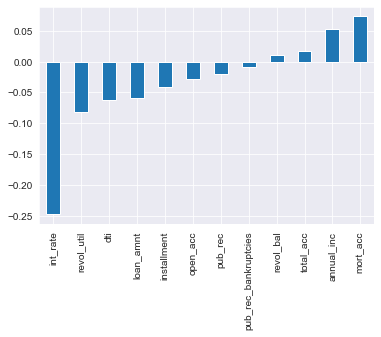

In [554]:
# as a plot
df.corr()['loan_repaid'][:-1].sort_values().plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [555]:
df.head()
# missing data (keep drop or fill)
# repetitive data to drop
# categorical to get_dummies

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [557]:
# 
len(df)
# 396K rows

396030

**TASK: Create a Series that displays the total count of missing values per column.**

In [558]:
# check for missing data
df.isnull().sum()
# no missing data

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [559]:
# description of cols with missing data
feat_info('emp_title')
feat_info('emp_length')
feat_info('title')
feat_info('revol_util')
feat_info('mort_acc')
feat_info('pub_rec_bankruptcies')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
The loan title provided by the borrower
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of mortgage accounts.
Number of public record bankruptcies


**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [560]:
# missing data as % of total rows
df.isnull().sum() / len(df) * 100
# need to focus on mort_acc, as we can't drop 10% of our data
# pub_rec_bankruptcies and revol_util are minor, so can drop those

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [561]:
# mp_title and emp_length description
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [562]:
# Are we to drop missing emp_title rows or fill it in with something or drop entire col
df['emp_title'].nunique()
# 173K unique job titles!
# our data set is 396K rows, around 40% have unique jobs titles
# way too many titles to convert into a dummy variable features
# therefore drop entire col

173105

In [563]:
df['emp_title'].value_counts()

Teacher                           4389
Manager                           4250
Registered Nurse                  1856
RN                                1846
Supervisor                        1830
                                  ... 
South West Wa Medical Center         1
Brown's Roofing Inc.                 1
Fire and safety                      1
Red Lambda Inc                       1
NYS Department of Transportion       1
Name: emp_title, Length: 173105, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [564]:
# drop emp_title 
df = df.drop('emp_title', axis=1)

In [565]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [566]:
# unique emp_length values
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [567]:
# order of emp_length
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [568]:
# manually reorder < 1 year and 10+ years
emp_length_order = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

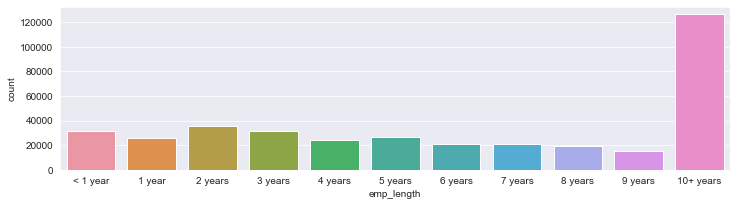

In [569]:
# Countplot of emp_length
plt.figure(figsize=(12,3))
sns.countplot('emp_length', data=df,order=emp_length_order)
# almost 30% of the data points/rows (applied for loans) are from people working 10+ years

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

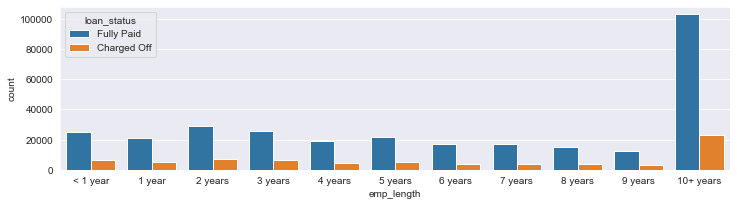

In [570]:
# how usefule is emp_length as a feature?
# compare fully paid vs charged off by emp_length
# emp_length with loan_status as hue
plt.figure(figsize=(12,3))
sns.countplot('emp_length', data=df,order=emp_length_order, hue='loan_status')
# can't tell much from this plot
# need to look at % charged off by emp_length

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [571]:
# 
df.groupby('emp_length')['loan_repaid'].count()

emp_length
1 year        25882
10+ years    126041
2 years       35827
3 years       31665
4 years       23952
5 years       26495
6 years       20841
7 years       20819
8 years       19168
9 years       15314
< 1 year      31725
Name: loan_repaid, dtype: int64

In [572]:
df.groupby('emp_length')['loan_repaid'].sum()

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_repaid, dtype: int64

In [573]:
emp_length_cnt = df.groupby('emp_length')['loan_repaid'].count()
emp_length_repaid = df.groupby('emp_length')['loan_repaid'].sum()
# pandas series

In [574]:
emp_length_dflt_pcnt = 1-(emp_length_repaid/emp_length_cnt)

In [575]:
emp_length_dflt_pcnt

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_repaid, dtype: float64

In [576]:
emp_length_dflt_pcnt.index

Index(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year'],
      dtype='object', name='emp_length')

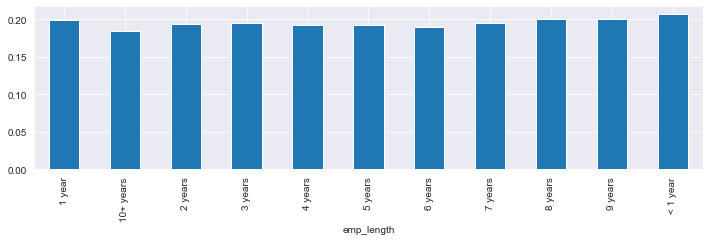

In [577]:
plt.figure(figsize=(12,3))
emp_length_dflt_pcnt.plot(kind='bar')
# % defaults (charged off) is almost the same across all emp_length
# doesn't appear to have strong predictive value
# people that work 10+ years have a slightly lower default rate
# consider dropping column emp_length

In [578]:
# another way to do it
emp_co = df[df['loan_status'] == 'Charged Off'].groupby('emp_length').count()['loan_status']

In [579]:
emp_fp = df[df['loan_status'] == 'Fully Paid'].groupby('emp_length').count()['loan_status']

In [580]:
emp_co_ratio = emp_co / emp_fp
emp_co_pct = emp_co / (emp_fp + emp_co)

In [581]:
emp_co_ratio

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [582]:
emp_co_pct

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_status, dtype: float64

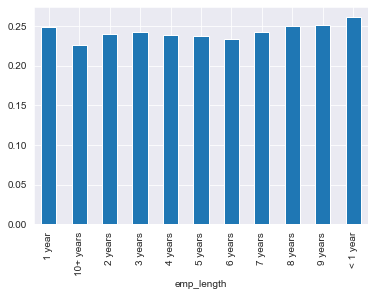

In [583]:
# charged off vs full paid ratio
emp_co_ratio.plot(kind='bar')

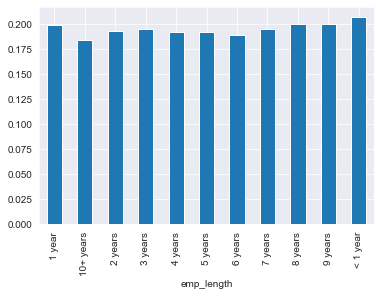

In [584]:
# charged off percentage
emp_co_pct.plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [585]:
# drop emp_length
df = df.drop('emp_length', axis=1)

In [586]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1


**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [587]:
# check for remaining missing data cols
df.isnull().sum()[df.isnull().sum() > 0]
# 4 remaining columns with missing data

title                    1755
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [588]:
# title and purpose may hold repeated info
feat_info('title')
feat_info('purpose')

The loan title provided by the borrower
A category provided by the borrower for the loan request. 


In [589]:
df['title'].nunique()
# 48 unique values

48817

In [590]:
df['purpose'].nunique()
# 14 unique values

14

In [591]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [592]:
df[['title', 'purpose']]
# both title and purpose hold similar info
# title has missing data and too many unique values to get_dummies
# drop title
# we'll stick with purpose and convert that to get_dummies

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [593]:
# drop title col
df = df.drop('title', axis=1)

In [594]:
df.columns
# title gone

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


Filling in missing data based on values of another column.

---
**TASK: Find out what the mort_acc feature represents**

In [595]:
# check for remaining missing data cols
df.isnull().sum()[df.isnull().sum() > 0]
# 3 remaining columns with missing data

revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [596]:
# mort_acc has around 10% missing values, cant drop rows
# but could drop the col
# what is mort_acc
# or fill missing values via another col that is highly corr with mort_acc
feat_info('mort_acc')

Number of mortgage accounts.


**TASK: Create a value_counts of the mort_acc column.**

In [597]:
# CODE HERE
df['mort_acc'].value_counts()
# 35% of people have no other mortgage accounts
# some outliers - people with 34 mortgage accounts

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columns to see which most highly correlates to mort_acc**

In [598]:
df.corr()['mort_acc'].drop('mort_acc').sort_values()
# most corr is total_acc, and we don't have missing values there
# it's not a high corr, so they're not duplicate columns

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [599]:
# avg mort acc per total acc
df.groupby('total_acc')['mort_acc'].mean()

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [600]:
# put in a variable to reference during fillna()
mort_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [601]:
# lookup a mort acc avg for a total_acc of 6.0 
mort_acc_avg[6.0]

0.15129310344827587

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [602]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mort_acc_avg[total_acc] # lookup avg mort_acc value
    else:
        return mort_acc

In [603]:
# apply fill_mort_acc function using lambda functions
# might take some time
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [604]:
df['mort_acc'].isnull().sum()
# no more missing values in mort_acc

0

In [605]:
# check for remaining missing data cols
df.isnull().sum()[df.isnull().sum() > 0]
# 2 remaining columns with missing data
# small percentage of missing data in both cases
# for these cols we can drop the rows

revol_util              276
pub_rec_bankruptcies    535
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [606]:
# drop na rows
df = df.dropna()

In [607]:
# check for remaining missing data cols
df.isnull().sum()[df.isnull().sum() > 0]
# 0 columns with missing data

Series([], dtype: int64)

In [608]:
df.isnull().sum()
# 0 columns with missing data

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [609]:
df.select_dtypes(include=['object']).columns
# we have to review these columns to either get_dummies for categorical
# or then remove column entirely

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [610]:
# what is term
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [611]:
df['term'].value_counts()
# 2 unique values 36 and 60

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [612]:
df['term'][1]
# see the leading space

' 36 months'

In [613]:
# convert them into integer of 36 and 60 as numerical
# could also convert to a boolean, but since there is a numerical relationship, but to make them numerical
df['term'] =  df['term'].map({' 36 months':36, ' 60 months':60})
# could also do
# df['term'] =  df['term'].apply(lambda term: int(term[:3]))

In [614]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

In [615]:
df['term'][1]

36

In [616]:
type(df['term'][1])

numpy.int64

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [617]:
# already know that grade is included in sub_grade, so we can drop grade
df = df.drop('grade', axis=1)

In [618]:
# remaining string columns
df.select_dtypes(include=['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [619]:
# get_dummies for sub_grade
dummies = pd.get_dummies(df['sub_grade'], drop_first=True)
# drop_first=True so as not to encode duplicate info

In [620]:
dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [621]:
# concat dummies with the dataframe
df = pd.concat([df, dummies], axis=1)

In [622]:
df.head(2)

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [623]:
# drop sub_grade col
df = df.drop('sub_grade', axis=1)

In [624]:
df.head(2)

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [625]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [626]:
# remaining string columns
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [627]:
# check description for verification_status, application_type, initial_list_status, purpose
feat_info('verification_status')
feat_info('application_type')
feat_info('initial_list_status')
feat_info('purpose')

Indicates if income was verified by LC, not verified, or if the income source was verified
Indicates whether the loan is an individual application or a joint application with two co-borrowers
The initial listing status of the loan. Possible values are – W, F
A category provided by the borrower for the loan request. 


In [628]:
df['verification_status'].value_counts()
# 3 categories, so ok to convert to dummies

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [629]:
df['application_type'].value_counts()
# 3 categories, so ok to convert to dummies

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [630]:
df['initial_list_status'].value_counts()
# 2 categories, so ok to convert to dummies

f    237346
w    157873
Name: initial_list_status, dtype: int64

In [631]:
df['purpose'].value_counts()
# 14 categories, so ok to convert to dummies

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [632]:
# get dummies all at once for for verification_status, application_type, initial_list_status, purpose
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status', 'purpose']], drop_first=True)

In [633]:
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status', 'purpose'], axis=1), dummies], axis=1)

In [634]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [635]:
# remaining string columns
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [636]:
# Home ownership
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [637]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [638]:
# change None and Any to Other using .replace or .map or .apply(lambda x:)
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [639]:
df['home_ownership'].value_counts()
# 4 categories

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [640]:
# get_dummies for home_ownership
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)

In [641]:
df = pd.concat([df.drop('home_ownership', axis=1), dummies], axis=1)

In [642]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [643]:
# remaining string columns
df.select_dtypes(include=['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [644]:
# address example
df['address'].head()
# state and zipcode can be feature engineered
# Zipcode is always the last 5 digits

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [645]:
df['zipcode'] = df['address'].apply(lambda addr: addr[-5:])

In [646]:
df['zipcode'].value_counts()
# 10 categories for Zipcode

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [647]:
# get_dummies for zipcode
dummies = pd.get_dummies(df['zipcode'], drop_first=True)
df = pd.concat([df.drop('zipcode', axis=1), dummies], axis=1)

In [648]:
# drop address column
df = df.drop('address', axis=1)

In [649]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

In [650]:
# remaining string columns
df.select_dtypes(include=['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [651]:
# issue_d description
feat_info('issue_d')

The month which the loan was funded


In [652]:
# This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model,
# so in theory we wouldn't have an issue_date, drop this feature.
# drop issue_d
df = df.drop('issue_d', axis=1)

In [653]:
# remaining string columns
df.select_dtypes(include=['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [654]:
# earliest_cr_year description and example
feat_info('earliest_cr_line')
df['earliest_cr_line'].head()
# this is a historical time stamp, since it's historical, there is no data leakage
# last 4 digits are the year

The month the borrower's earliest reported credit line was opened


0    Jun-1990
1    Jul-2004
2    Aug-2007
3    Sep-2006
4    Mar-1999
Name: earliest_cr_line, dtype: object

In [655]:
# either convert to date time, or extract last for characters and convert to int
# overwrite earliest_cr_line col
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda yr: int(yr[-4:]))
# no need to convert to dummy variables, as year can be treated as continous numerical

In [656]:
# remaining string columns
df.select_dtypes(include=['object']).columns
# which is the class

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [657]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [658]:
# drop loan_status, since we added a loan_repaid bool col for our class
df = df.drop('loan_status', axis=1)

In [659]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650',

**TASK: Set X and y variables to the .values of the features and label.**

In [660]:
# set X to a numpy array
X = df.drop('loan_repaid', axis=1).values

In [661]:
# set X to a pandas series
y = df['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [121]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))
# We'll run on the full dataset

395219


___
___
**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [662]:
# 20% test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [663]:
from sklearn.preprocessing import MinMaxScaler

In [664]:
# create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [665]:
# Fit and Normalize Training data
# we'll do scaling post split, on the training data, to prevent data leakage from the test set
# save time by fitting and transforming on the training data in one go
X_train = scaler.fit_transform(X_train)

In [666]:
# Normalize Test data
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [667]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [668]:
X_train.shape
# 316K rows and 78 features

(316175, 78)

In [669]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.
# 78 --> 39 --> 19--> 1
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# add 20% dropout layers 

# input layer
model.add(Dense(78,activation='relu')) # Layer L-3, 78 neurons to match number of features
model.add(Dropout(0.2)) # turn off 20% neurons randomly

# hiddent layers
model.add(Dense(39,activation='relu')) # Layer L-2, 39 neurons
model.add(Dropout(0.2)) # turn off 20% neurons randomly

model.add(Dense(19,activation='relu')) # Layer L-1, 19 neurons
model.add(Dropout(0.2)) # turn off 20% neurons randomly


# output layer
model.add(Dense(1,activation='sigmoid')) # sigmoid activation function for binary classification (0 or 1)


# Remember to compile()
# select adam optimizer
# select binary_crossentropy as loss function since this is a classification problem
model.compile(optimizer='adam',loss='binary_crossentropy')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [686]:
# fit model with early stopping callback
model.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), epochs=25, batch_size=256)
# add callbacks=[early_stop]

Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2548 - val_loss: 0.2612
Epoch 2/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2549 - val_loss: 0.2609
Epoch 3/25
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2546 - val_loss: 0.2631
Epoch 4/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2546 - val_loss: 0.2611
Epoch 5/25
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2544 - val_loss: 0.2615
Epoch 6/25
316175/316175 [==============================] - 4s 12us/sample - loss: 0.2544 - val_loss: 0.2614
Epoch 7/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2542 - val_loss: 0.2612
Epoch 8/25
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2541 - val_loss: 0.2610
Epoch 9/25
316175/316175 [==============================] - 5s 15us/sample - 

In [687]:
# Early Stopping model:

In [688]:
from tensorflow.keras.callbacks import EarlyStopping

In [689]:
# early stopping has 2 steps
# to define the variable validation loss
# mode i.e. are we trying to minimize/ maximize the metric we're monitoring
# e.g. if we're monitoring accuracy, we'd want to maximize that
# auto infers min/max based on metric
# in this case we want to minimize the validation loss
# we'll set patience to 25, meaning we'll wait 25 epochs even after we detect as stopping point, just incase of noise
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [690]:
# CODE HERE
model_es = Sequential()

# Choose whatever number of layers/neurons you want.
# 78 --> 39 --> 19--> 1
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
# add 20% dropout layers 

# input layer
model_es.add(Dense(78,activation='relu')) # Layer L-3, 78 neurons to match number of features
model_es.add(Dropout(0.2)) # turn off 20% neurons randomly

# hiddent layers
model_es.add(Dense(39,activation='relu')) # Layer L-2, 39 neurons
model_es.add(Dropout(0.2)) # turn off 20% neurons randomly

model_es.add(Dense(19,activation='relu')) # Layer L-1, 19 neurons
model_es.add(Dropout(0.2)) # turn off 20% neurons randomly


# output layer
model_es.add(Dense(1,activation='sigmoid')) # sigmoid activation function for binary classification (0 or 1)


# Remember to compile()
# select adam optimizer
# select binary_crossentropy as loss function since this is a classification problem
model_es.compile(optimizer='adam',loss='binary_crossentropy')

In [691]:
# fit model with early stopping callback
model_es.fit(x=X_train,y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=256, callbacks=[early_stop])
# add callbacks=[early_stop]

# initially model was set for 25 epochs
# with early stopping it only ran for 18 epochs with patience of 15,
# which means the loss vs val_loss after 3 epochs would have been fine

Train on 316175 samples, validate on 79044 samples
Epoch 1/50
316175/316175 [==============================] - 7s 22us/sample - loss: 0.2986 - val_loss: 0.2641
Epoch 2/50
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2652 - val_loss: 0.2630
Epoch 3/50
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2625 - val_loss: 0.2628
Epoch 4/50
316175/316175 [==============================] - 4s 13us/sample - loss: 0.2616 - val_loss: 0.2623
Epoch 5/50
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2610 - val_loss: 0.2618
Epoch 6/50
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2604 - val_loss: 0.2620
Epoch 7/50
316175/316175 [==============================] - 4s 14us/sample - loss: 0.2598 - val_loss: 0.2614
Epoch 8/50
316175/316175 [==============================] - 5s 15us/sample - loss: 0.2596 - val_loss: 0.2615
Epoch 9/50
316175/316175 [==============================] - 5s 16us/sample - 

**TASK: OPTIONAL: Save your model.**

In [692]:
# save model especially if it's complex and took a while to train
from tensorflow.keras.models import load_model

In [693]:
# take current model and save as h5 file
model.save('keras_model_classification_project.h5')
model_es.save('keras_model_classification_project_earlystopping.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [695]:
# Expolore the history of historical losses
# a dictionary of the historical losses
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,val_loss
0,0.254789,0.261184
1,0.254885,0.260870
2,0.254565,0.263079
3,0.254560,0.261064
4,0.254405,0.261460


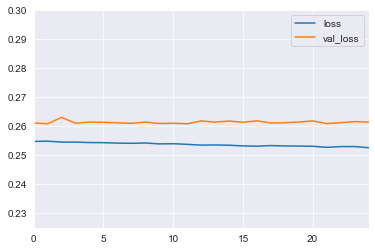

In [704]:
#losses.plot()
losses.plot(ylim=(0.225,0.3))

In [699]:
# Expolore the history of historical losses
# a dictionary of the historical losses
losses_es = pd.DataFrame(model_es.history.history)
losses_es.head()

,loss,val_loss
0,0.298582,0.264141
1,0.265159,0.262958
2,0.262487,0.262825
3,0.261587,0.262273
4,0.260959,0.261759


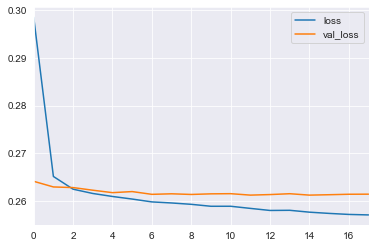

In [703]:
losses_es.plot()
#losses_es.plot(ylim=(0.225,0.3))

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [705]:
# predictions
# since this is a classification we use model.predict_classes() instead of model.predict() 
predictions = model.predict_classes(X_test)
predictions_es = model_es.predict_classes(X_test)

In [706]:
from sklearn.metrics import classification_report,confusion_matrix

In [707]:
# Classification Report
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))
print('\n')
print('Classification Report')
print(classification_report(y_test, predictions))
# TN, FN
# FP, TP
# 89% accuracy
# accuracy is a good measure as our classes were reasonably balanced
# that's not the case for loan repayments, as it's not a well balanced class
# there are far more fully paid loans than charged off
# many missclassifications especially the 0 (charged off) causing lots of FN
# precision is high for both classes, 97% 0 (charged off) and 88% for 1 (fully paid)
# recall is 44% 0 (charged off) and 100% for 1 (fully paid)
# recall is where the model suffers
# f1 score is the harmonic mean between precision and recall and is only 61% for 0 (charged off)
# we need more context to decide if the recall and f1-score are good enough
# all we can say is the accuracy is better than the default 80%
# i.e. the model is better than a random guess (50% accuracy) or simpley model i.e. loan always repaid (80% accuracy)

# we can modify the model hyper params, add in more layers, increase the dropout rate, add early stopping

Confusion Matrix
[[ 6947  8711]
 [  185 63201]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [709]:
df['loan_repaid'].value_counts()
# 317696 loans were fully repaid

1    317696
0     77523
Name: loan_repaid, dtype: int64

In [711]:
317696 / len(df)
# 80% of loans are typically paid off
# a simple model that says any loan will always be repaid, we'd be correct 80% of the time i.e. 80% accuracy
# so our model accuracy of 89% is ok, but not fantastic, given the baseline is 80%

0.8038479931379817

In [708]:
# Classification Report for early stopping model
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions_es))
print('\n')
print('Classification Report')
print(classification_report(y_test, predictions_es))
# TN, FN
# FP, TP
# 89% accuracy
# accuracy is a good measure as our classes were reasonably balanced
# that's not the case for loan repayments, as it's not a well balanced class
# there are far more fully paid loans than charged off
# many missclassifications especially the 0 (charged off) causing lots of FN
# precision is high for both classes, 97% 0 (charged off) and 88% for 1 (fully paid)
# recall is 44% 0 (charged off) and 100% for 1 (fully paid)
# recall is where the model suffers
# f1 score is the harmonic mean between precision and recall and is only 61% for 0 (charged off)
# we need more context to decide if the recall and f1-score are good enough
# all we can say is the accuracy is better than the default 80%
# i.e. the model is better than a random guess (50% accuracy) or simple model i.e. loan always repaid (80% accuracy)

# EARLY STOPPING didn't impove the model
# we can modify the model hyper params, add in more layers, increase the dropout rate

Confusion Matrix
[[ 6756  8902]
 [   19 63367]]


Classification Report
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



**TASK: Given the customer below, would you offer this person a loan?**

In [712]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [719]:
# convert new_customer to numpy array
# and reshape to be in same shape as training data (adds an nother set of array brackets)
new_customer.values.reshape(1, 78)


array([[2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
        3.0110e+01, 1.9960e+03, 1.6000e+01, 0.0000e+00, 2.7778e+04,
        6.5500e+01, 4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

In [721]:
# scale new_customer
new_customer = scaler.transform(new_customer.values.reshape(1, 78))

In [722]:
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.75362319, 0.2       , 0.        , 0.01593446,
        0.07340581, 0.29530201, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.  

In [723]:
model.predict_classes(new_customer)

array([[1]])

In [724]:
# early stopping model
model_es.predict_classes(new_customer)

array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [727]:
df.iloc[random_ind]['loan_repaid']
# prediction was correct

1.0

In [729]:
# or
df['loan_repaid'].iloc[random_ind]
# prediction was correct

1

# GREAT JOB!